In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from weak_lensing import *
c = cosmology()

In [2]:
zmin = 0.01
zmax = 2
kmin=1e-5
kmax=1e3

In [4]:
ps_colossus = power_spectrum(zmin=zmin, zmax=zmax,kmin=kmin,kmax=kmax)

kmin = 1.000e-05, kmax = 1.000e+03, chimin = 4.437e+01, chimax = 5.312e+03, zmin = 0.010, zmax = 2.000
Computed Pmm using Colossus


In [5]:
ps_hmcode = power_spectrum(zmin=zmin, zmax=zmax,kmin=kmin,kmax=kmax,use_camb=True,nonlin_model='mead2016')

kmin = 1.000e-05, kmax = 1.000e+03, chimin = 4.437e+01, chimax = 5.312e+03, zmin = 0.010, zmax = 2.000
Note: redshifts have been re-sorted (earliest first)
Computed Pmm using CAMB


In [6]:
ps_halofit = power_spectrum(zmin=zmin, zmax=zmax,kmin=kmin,kmax=kmax,use_camb=True,nonlin_model='takahashi')

kmin = 1.000e-05, kmax = 1.000e+03, chimin = 4.437e+01, chimax = 5.312e+03, zmin = 0.010, zmax = 2.000
Note: redshifts have been re-sorted (earliest first)
Computed Pmm using CAMB


In [7]:
ps_camb_lin = power_spectrum(zmin=zmin, zmax=zmax,kmin=kmin,kmax=kmax,use_camb=True,nonLinear=False)

kmin = 1.000e-05, kmax = 1.000e+03, chimin = 4.437e+01, chimax = 5.312e+03, zmin = 0.010, zmax = 2.000
Note: redshifts have been re-sorted (earliest first)
Computed Pmm using CAMB


In [66]:
ps_halomodel = power_spectrum(zmin=zmin, zmax=zmax,kmin=kmin,kmax=kmax,Pmm_file='standard_halo_model_power_spectra005.npz',Pmm_field='P_hh_total')

kmin = 1.000e-05, kmax = 1.000e+03, chimin = 4.437e+01, chimax = 5.312e+03, zmin = 0.010, zmax = 2.000
Loaded Pmm from file: standard_halo_model_power_spectra005.npz, field: P_hh_total


In [60]:
ps_subhalomodel = power_spectrum(zmin=zmin, zmax=zmax,kmin=kmin,kmax=kmax,Pmm_file='halo_model_power_spectra_substructure005.npz',Pmm_field='P_hh_total')

kmin = 1.000e-05, kmax = 1.000e+03, chimin = 4.437e+01, chimax = 5.312e+03, zmin = 0.010, zmax = 2.000
Loaded Pmm from file: halo_model_power_spectra_substructure005.npz, field: P_hh_total


In [67]:
logP_interp_hmcode = ps_hmcode.get_logPmm_interp()
logP_interp_halofit = ps_halofit.get_logPmm_interp()
logP_interp_colossus = ps_colossus.get_logPmm_interp()
logP_interp_camb_lin = ps_camb_lin.get_logPmm_interp()
logP_interp_halomodel = ps_halomodel.get_logPmm_interp()
logP_interp_subhalomodel = ps_subhalomodel.get_logPmm_interp()

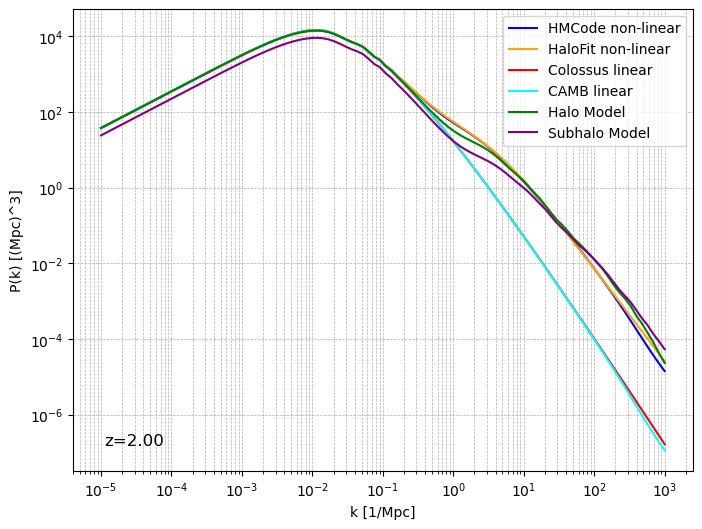

In [69]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

k = np.logspace(np.log10(kmin),np.log10(kmax),100)
z = zmax

P_hmcode = np.exp(logP_interp_hmcode((z,k)))
P_halofit = np.exp(logP_interp_halofit((z,k)))
P_colossus = np.exp(logP_interp_colossus((z,k)))
P_camb_lin = np.exp(logP_interp_camb_lin((z,k)))
P_halomodel = np.exp(logP_interp_halomodel((z,k)))
P_subhalomodel = np.exp(logP_interp_subhalomodel((z,k)))

ax.plot(k, P_hmcode, label=f'HMCode non-linear', color='blue')   
ax.plot(k, P_halofit, label=f'HaloFit non-linear', color='orange')
ax.plot(k, P_colossus, label=f'Colossus linear', color='red')
ax.plot(k, P_camb_lin, label=f'CAMB linear', color='cyan')
ax.plot(k, P_halomodel, label=f'Halo Model', color='green')
ax.plot(k, P_subhalomodel, label=f'Subhalo Model', color='purple')
ax.text(
    0.05, 0.05, f'z={z:.2f}',
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='bottom',
    horizontalalignment='left'
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('k [1/Mpc]')
ax.set_ylabel('P(k) [(Mpc)^3]')
ax.legend(loc='upper right')
ax.grid(True, which='both', ls='--', lw=0.5)
plt.show()

In [64]:
sigma8_hmcode = ps_hmcode.get_sigma8()
sigma8_halofit = ps_halofit.get_sigma8()
sigma8_colossus = ps_colossus.get_sigma8()
sigma8_camb_lin = ps_camb_lin.get_sigma8()
sigma_8_halomodel = ps_halomodel.get_sigma8()
sigma_8_subhalomodel = ps_subhalomodel.get_sigma8()

In [74]:
pars = camb.CAMBparams()
pars.set_cosmology(
            H0=c.h*100,                          
            ombh2=c.OmegaB * c.h**2,
            omch2=c.OmegaC * c.h**2,
            mnu=0.0,                                    # no massive neutrinos by default
            omk=0.0,                                    
            tau=0.054                                   # optical depth, Planck 2018 default
        )
    
pars.InitPower.set_params(As=c.As, ns=c.ns)
pars.set_matter_power(redshifts=[zmin,zmax], kmax=kmax, nonlinear=False)
results = camb.get_results(pars)
sigma8 = results.get_sigma8()

print(sigma8)
print(sigma8_camb_lin[-1],sigma8_camb_lin[0])

Note: redshifts have been re-sorted (earliest first)
[0.35312985 0.84188625]
0.3531870356871341 0.8420225783993323


Sigma8 at z=0: Halo model =0.89432, HMCode=0.95049, HaloFit=0.94850, CAMB Linear=0.84202, Colossus=0.84199


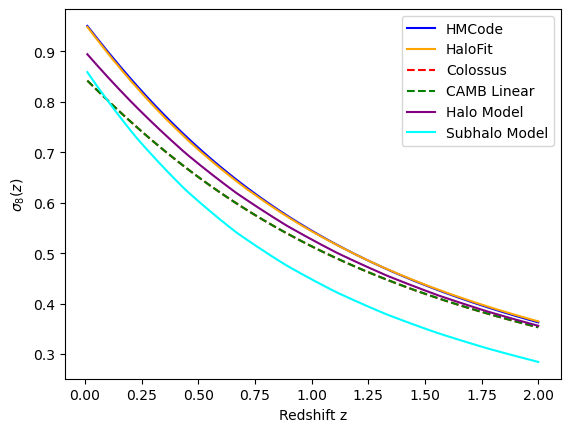

In [75]:
plt.plot(ps_hmcode.z_ps, sigma8_hmcode, label='HMCode', color='blue')
plt.plot(ps_halofit.z_ps, sigma8_halofit, label='HaloFit', color='orange')
plt.plot(ps_colossus.z_ps, sigma8_colossus, label='Colossus', color='red',ls='--')
plt.plot(ps_camb_lin.z_ps, sigma8_camb_lin, label='CAMB Linear', color='green',ls='--')
plt.plot(ps_halomodel.z_ps, sigma_8_halomodel, label='Halo Model', color='purple')
plt.plot(ps_subhalomodel.z_ps, sigma_8_subhalomodel, label='Subhalo Model', color='cyan')
plt.xlabel('Redshift z')
plt.ylabel(r'$\sigma_8(z)$')
plt.legend()
print(f"Sigma8 at z=0: Halo model ={sigma_8_halomodel[0]:.5f}, HMCode={sigma8_hmcode[0]:.5f}, HaloFit={sigma8_halofit[0]:.5f}, CAMB Linear={sigma8_camb_lin[0]:.5f}, Colossus={sigma8_colossus[0]:.5f}")

In [79]:
R_sigma = ps_halomodel.find_Rsigma(P_halomodel, k)

neff = ps_halomodel.neff_at_R(R_sigma, P_halomodel, k)

alpha = 1.875 * (1.603)**(neff)

print("neff =", neff)
print("alpha =", alpha)


neff = -1.6043084929996525
alpha = 0.8794773955717341


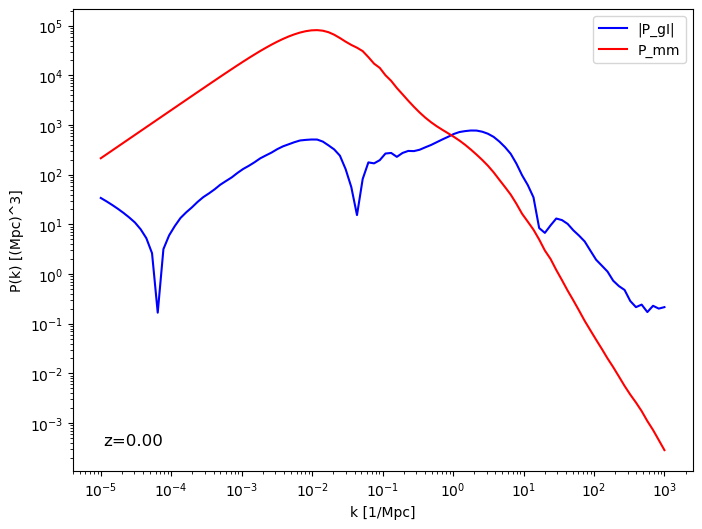

In [32]:
NLA=False
P_gI_interp = ps_halomodel.get_PgI_interp(NLA=NLA)
logPmm_interp = ps_halomodel.get_logPmm_interp()
fig, ax = plt.subplots(1,1, figsize=(8,6))

k = np.logspace(np.log10(kmin),np.log10(kmax),100)
z=0
P_gI = P_gI_interp((z,k))
P_mm = np.exp(logPmm_interp((z,k)))

ax.plot(k, np.abs(P_gI), label=f'|P_gI|', color='blue')   
ax.plot(k, P_mm, label=f'P_mm', color='red')   
ax.text(
    0.05, 0.05, f'z={z:.2f}',
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='bottom',
    horizontalalignment='left'
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('k [1/Mpc]')
ax.set_ylabel('P(k) [(Mpc)^3]')
ax.legend(loc='upper right')
plt.show()

In [54]:
Cls_halo = np.load('Cls_halo.npz')
Cls_sub = np.load('Cls_subhalo.npz')
Cls_halofit = np.load('Cls_halofit.npz')
Cls_hmcode = np.load('Cls_HMcode2020.npz')

In [55]:
ells = Cls_halo['ells']

cls_ge_sub = Cls_sub['cls_gk']
cls_ia_sub = Cls_sub['cls_gI']
cls_ia_mag_sub = Cls_sub['cls_mag_I']
cls_mag_sub = Cls_sub['cls_mag_k']
cls_gg_sub = Cls_sub['cls_gg']
cls_ee_sub = Cls_sub['cls_kk']

cls_ge_halo = Cls_halo['cls_gk']
cls_ia_halo = Cls_halo['cls_gI']
cls_ia_mag_halo = Cls_halo['cls_mag_I']
cls_mag_halo = Cls_halo['cls_mag_k']
cls_gg_halo = Cls_halo['cls_gg']
cls_ee_halo = Cls_halo['cls_kk']

cls_ge_halofit = Cls_halofit['cls_gk']
cls_ia_halofit = Cls_halofit['cls_gI']
cls_ia_mag_halofit = Cls_halofit['cls_mag_I']
cls_mag_halofit = Cls_halofit['cls_mag_k']
cls_gg_halofit = Cls_halofit['cls_gg']
cls_ee_halofit = Cls_halofit['cls_kk']  

cls_ge_hmcode = Cls_hmcode['cls_gk']
cls_ia_hmcode = Cls_hmcode['cls_gI']
cls_ia_mag_hmcode = Cls_hmcode['cls_mag_I']    
cls_mag_hmcode = Cls_hmcode['cls_mag_k']
cls_gg_hmcode = Cls_hmcode['cls_gg']
cls_ee_hmcode = Cls_hmcode['cls_kk']

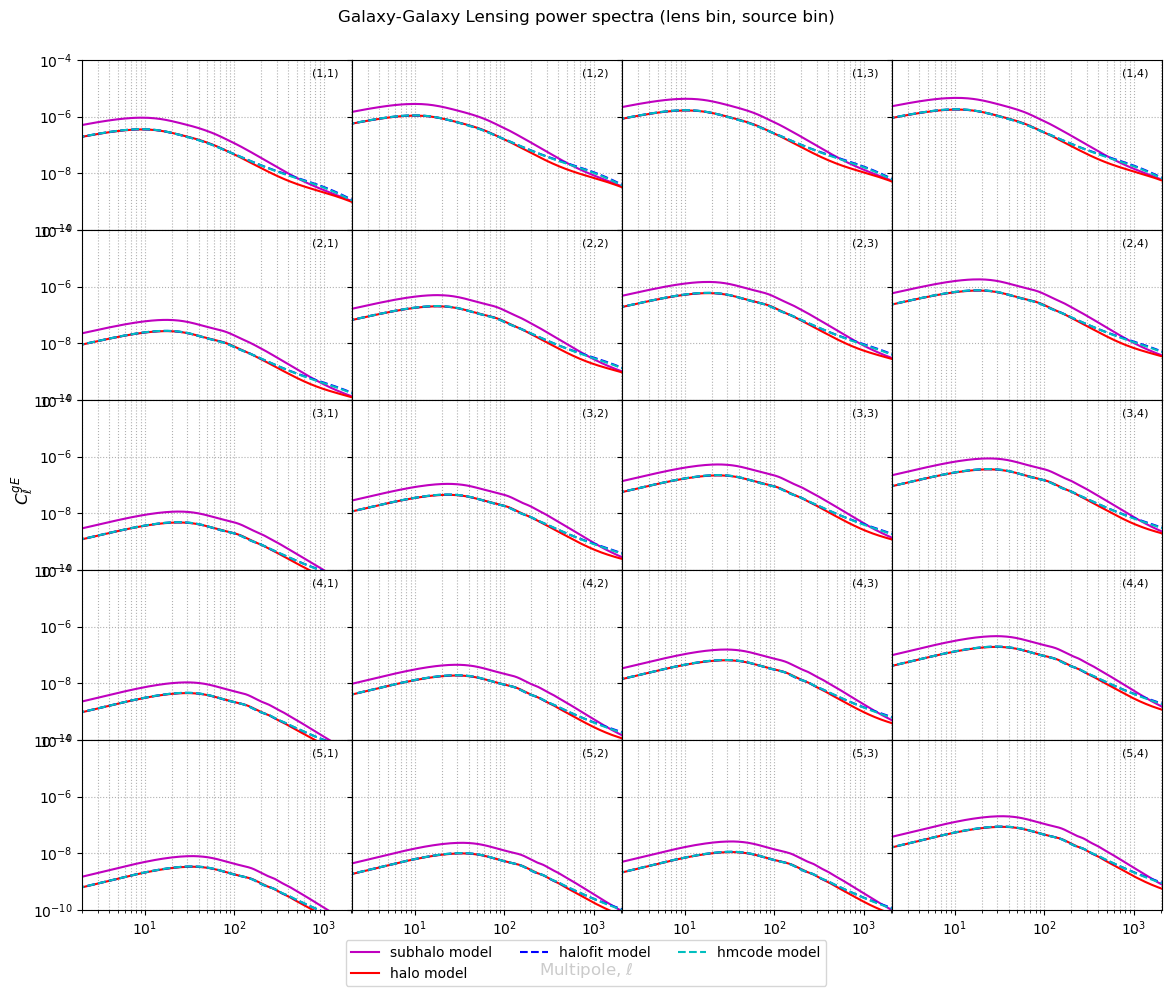

In [56]:
n_lens, n_source = 5, 4
fig = plt.figure(figsize=(12, 10))
fig.suptitle('Galaxy-Galaxy Lensing power spectra (lens bin, source bin)')

# Loop over bins
for i in range(n_lens):
    for j in range(n_source):
        
        # subplot index (1-based)
        idx = i * n_source + j + 1
        ax = fig.add_subplot(n_lens, n_source, idx)

        # Main spectra
        ax.plot(ells, cls_ge_sub[i, j, :]+cls_ia_sub[i, j, :]+cls_ia_mag_sub[i, j, :]+cls_mag_sub[i, j, :], color='m', linestyle='-', label='subhalo model')
        ax.plot(ells, cls_ge_halo[i, j, :]+cls_ia_halo[i, j, :]+cls_ia_mag_halo[i, j, :]+cls_mag_halo[i, j, :], color='r', linestyle='-', label='halo model')
        ax.plot(ells, cls_ge_halofit[i, j, :]+cls_ia_halofit[i, j, :]+cls_ia_mag_halofit[i, j, :]+cls_mag_halofit[i, j, :], color='b', linestyle='--', label='halofit model')
        ax.plot(ells, cls_ge_hmcode[i, j, :]+cls_ia_hmcode[i, j, :]+cls_ia_mag_hmcode[i, j, :]+cls_mag_hmcode[i, j, :], color='c', linestyle='--', label='hmcode model')

        # bin label
        ax.text(0.95, 0.95, f"({i+1},{j+1})",
                transform=ax.transAxes, ha="right", va="top", fontsize=8)

        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.grid(True, which="both", ls=":")

        # Shared limits
        ax.set_xlim(2, ells[-1])
        ax.set_ylim(1e-10, 1e-4)

        # Clean labels inside the grid
        if j > 0:
            ax.set_yticklabels([])
        if i < n_lens - 1:
            ax.set_xticklabels([])

# Shared axis labels
fig.supxlabel(r"Multipole, $\ell$", fontsize=12)
fig.supylabel(r"$C_{\ell}^{gE}$", fontsize=12)

# Legend: take from the final ax
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)

plt.subplots_adjust(wspace=0.0, hspace=0.0,
                    top=0.93, bottom=0.08, left=0.08, right=0.98)

plt.show()